<a href="https://cognitiveclass.ai"><img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/IDSNlogo.png" width = 400> </a>

<h1 align=center><font size = 5>Turkish Cuisine: Business Business Entry</font></h1>
<h2 align=center><font size = 4>Capstone Project - The Battle of the Neighborhoods</font></h2>
<h3 align=center><font size = 3>Applied Data Science Capstone by IBM/Coursera</font></h3>


## Table of contents

1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis](#analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)


## 1. Introduction <a name="introduction"></a>

Middle Eastern cuisine has a rich historical past. Especially the geography of Turkey is a unique place where many different civilizations have lived and different cuisines created a common value. The cosmopolitan structure of middle eastern cuisine is also reflected in the city of Chicago. Almost everyone who comes from different nationalities and settles in Chicago can easily reach restaurants and markets suitable for their own cuisine and taste.

Chicago has a population of close to 10 million and is one of the most important business centers of America. It is not only a business center but also an important touristic center. Besides the city's architectural history and artifacts, the Chicago lake adds a special value to the city. In addition to these, Chicago, which has a historical background in terms of university education and academic studies, is one of the centers chosen by students to build their careers. 

Chicago draws attention with a food industry exceeding 7 trillion dollars (http://www.worldbusinesschicago.com/key-industries/foodmanufacturing/). Food&Enjoy Enterprise, one of Turkey's leading restaurant chains, wants to enter this attractive market with the flavors of traditional Middle Eastern cuisine. Since the company's knowledge of the American food industry is limited, it needs smart strategies in this regard.

Food&Enjoy states that the flavors it offers are the first choice of tourists both from within the country and from abroad. They express that especially those coming from the Middle East geography are no different from the tastes of their own countries. Therefore, they would like to reach people close to this culture in Chicago.

There is a significant competition on the price axis in Chicago. For example, certain chain stores in the pizza sector sustain customer loyalty with a low price policy. Contrary to price-based competition, this entrepreneurial company states that they prefer to be in the competition based on taste. Therefore, they want to serve flavor lovers who will prefer their products for flavor.

Hence, it would be wise to consider the distrbution of the restaurants within the city. Moreover, the income and prosperity of potential customers would be equally essential to take into account. Even, the size of the population as well its density should be considered before any investment into this new venture.

In this project, I will implement a very first analysis in order to find the most optimal community areas to construct the new entrepreneurial attempt by considering the criterion mentioned juts above. Of course, they are are not enough to build a complete business. But for further research, the very basic analysis should be employed and the main focus areas should be determined and then the exact location could be chosen within the predetermined community areas.

## 2. Data <a name="data"></a>

### 2.1 Data description

Necessary data will be collected in order to meet the conditions given above. Then, the data will be analyzed and the desired strategies will be developed.

Based on criteria listed above the following data will be collected for the further analysis:
- the medien income per person in each neighborhood. This is relevant data since Food&Enjoy Enterprise would like reach real taste lovers (https://statisticalatlas.com/state/Illinois/Household-Income)
- the population and the population density of the neighborhoods are another decisive factor (https://statisticalatlas.com/state/Illinois/Population)
- the distribution of restaurants within the each neighborhood (Foresquare API)
- the coordinates of the neighborhoods. Source: Open street map (https://nominatim.openstreetmap.org/details.php?place_id=17476218)

### 2.2 Data Preparation

Although Chicago has 77 community areas and they are well-defined, the main focus would be on Chicago neighborhoods. This preference would be much more sensible for the first enterance since this provides us more homogeneous societies and more valuable information and guidance. There is no well-accepted neighborhoods definitions. But, from statistical point of view I would prefer to use statistical atlas of USA (https://statisticalatlas.com/United-States/Overview). Although according to the satistical atlas there are 228 neighborhoods, wikipedia defines 246 neighborhoods. It is wise to use the definitions of statistical atlas of USA since the statistics are provided by this web page.

<img src="ChicagoNeighborhoods.jpg" alt="alt text" width="800"/>

#### There are different tools for web scraping such as Beautifulsoup, Scrapy,  Selenium etc. In this project I would prefer Webdriver of Selenium. Through Selenium Webdriver Chicago neighborhoods with their community areas are obtained and stored as dataframe as follows.

In [1]:
# install Selenium
!pip install Selenium

#### Now, let us find all the neighborhoods in Chicago and store them into a dataframe.

In [2]:
# importing webriver and pandas
from selenium import webdriver
import pandas as pd
import numpy as np
import time
# locate chromedriver.exe and define URL
chrome_path = r'C:\Webdriver\chromedriver.exe'
driver = webdriver.Chrome(executable_path=chrome_path)
url='https://statisticalatlas.com/place/Illinois/Chicago/Overview'
driver = webdriver.Chrome(executable_path=r'C:\Webdriver\chromedriver.exe')
# Load wikipedia webpage and wait 3 seconds until all information is loaded
driver.get(url)
time.sleep(3)
# With css_selector locate the names of all neighborhoos in chicago
infos=driver.find_elements_by_css_selector('#top > div.container-fluid.container-capped > div > div.col-sm-12.col-md-10 > div.info-table > div:nth-child(8) > div.info-table-contents-td.col-sm-9 > div > a')
# Create a list to store the results
result=[]
# Loop over all elements in webpage and store them as text
for info in infos:
    neighborhood=info.text
    result.append(neighborhood)

# store in dataframe
df_neighborhoods_names = pd.DataFrame(result)
df_neighborhoods_names.rename(columns={0:'Neighborhood'},inplace=True)
print(df_neighborhoods_names.head())

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=91.0.4472.124)


In [3]:
df_neighborhoods_names.shape

(228, 1)

#### Every location could be located by their latitude and longitude in order to explore all locations.

In [4]:
# install geopy
!pip install geopy

In [8]:
# importing geopy library
from geopy.geocoders import Nominatim
  
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")

# Add latitide and logitude columns
df_neighborhoods_names['Latitude']=""
df_neighborhoods_names['Longitude']=""

for row in range(0,len(df_neighborhoods_names)):
    # entering the location name
    address=df_neighborhoods_names['Neighborhood'][row]+", chicago"
    # entering the location name
    getLoc = loc.geocode(address)
    # check if returning values are not none
    if getLoc is None:
            df_neighborhoods_names['Latitude'][row] = np.nan
            df_neighborhoods_names['Longitude'][row] = np.nan
    else:
        df_neighborhoods_names['Latitude'][row] = getLoc.latitude
        df_neighborhoods_names['Longitude'][row] = getLoc.longitude


NameError: name 'df_neighborhoods_names' is not defined

In [1]:
# importing geopy library
from geopy.geocoders import Nominatim
  
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")
address="Arcadia Terrace, Chicago, Illinois, USA"
getLoc = loc.geocode(address)
print(getLoc.latitude, getLoc.longitude)


41.9098048 -87.71013317912036


In [6]:
df_neighborhoods_names.head(20)

,Neighborhood,Latitude,Longitude
0,Albany Park,41.970329,-87.715992
1,Altgeld Gardens,41.655259,-87.609584
2,Andersonville,41.977139,-87.669273
3,Arcadia Terrace,41.909805,-87.710133
4,Archer Heights,41.811422,-87.726165
5,Ashburn,41.747533,-87.711163
6,Avalon Park,41.745035,-87.588658
7,Avondale,41.938921,-87.711168
8,Back of the Yards,41.807533,-87.66612
9,Belmont Central,41.939796,-87.653328


#### As it can be seen that there are NaN values in dataframe. So, let us look at the number of NaN values.

In [7]:
df_neighborhoods_names[df_neighborhoods_names['Latitude'].isnull()]

,Neighborhood,Latitude,Longitude
11,Belmont Heights,NaN,NaN
62,Fulton River District,NaN,NaN
78,Heart of Italy,NaN,NaN
86,Ida B. Wells - Darrow Homes,NaN,NaN
89,Irving Woods,NaN,NaN
92,Kelvin Park,NaN,NaN
100,Lakewood - Balmoral,NaN,NaN
114,Marycrest,NaN,NaN
151,Powder Horn Lake,NaN,NaN
174,Sheffield Neighbors,NaN,NaN


#### Since 13 rows have no coordinate values. It is easy to manually complete the data. By simply looking at Google.maps, the values are stored as follows.

In [8]:
df_neighborhoods_names['Latitude'][11]=41.9451265
df_neighborhoods_names['Longitude'][11]=-87.8143316
df_neighborhoods_names['Latitude'][62]=41.8894949
df_neighborhoods_names['Longitude'][62]=-87.6433644
df_neighborhoods_names['Latitude'][78]=41.8486142
df_neighborhoods_names['Longitude'][78]=-87.6846162
df_neighborhoods_names['Latitude'][86]=41.8285789
df_neighborhoods_names['Longitude'][86]=-87.6173674
df_neighborhoods_names['Latitude'][89]=41.9486764
df_neighborhoods_names['Longitude'][89]=-87.8300628
df_neighborhoods_names['Latitude'][92]=41.9323486
df_neighborhoods_names['Longitude'][92]=-87.7443371
df_neighborhoods_names['Latitude'][100]=41.9799008
df_neighborhoods_names['Longitude'][100]=-87.6624815
df_neighborhoods_names['Latitude'][114]=41.7376036
df_neighborhoods_names['Longitude'][114]=-87.7058723
df_neighborhoods_names['Latitude'][151]=41.6426952
df_neighborhoods_names['Longitude'][151]=-87.5303126
df_neighborhoods_names['Latitude'][174]=41.9216605
df_neighborhoods_names['Longitude'][174]=-87.6583375
df_neighborhoods_names['Latitude'][188]=41.6915904
df_neighborhoods_names['Longitude'][188]=-87.7008049
df_neighborhoods_names['Latitude'][193]=41.809198
df_neighborhoods_names['Longitude'][193]=-87.6285506
df_neighborhoods_names['Latitude'][226]=41.9285649
df_neighborhoods_names['Longitude'][226]=-87.6563505

#### Check one more time if there is null values.

In [9]:
df_neighborhoods_names.isnull().values.any()

False

#### Now, very basic data is ready. For further use it would be stored into excel file and rename the dataframe as df_neigborhoods

In [10]:
df_neighborhoods_names.to_excel("chicago_neighboorhoods_coordinates.xls") 
df_neighborhoods=df_neighborhoods_names
df_neighborhoods.head()

<ipython-input-10-6d9887b4ccfb>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_neighborhoods_names.to_excel("chicago_neighboorhoods_coordinates.xls")


,Neighborhood,Latitude,Longitude
0,Albany Park,41.970329,-87.715992
1,Altgeld Gardens,41.655259,-87.609584
2,Andersonville,41.977139,-87.669273
3,Arcadia Terrace,41.909805,-87.710133
4,Archer Heights,41.811422,-87.726165


#### Now,  it will a new dataframe is defined in order to collect all necessary data into one frame.

In [11]:
column_names = ['Neighborhood','Latitude','Longitude','Income','Population','Population Density']
df_distributions = pd.DataFrame(columns = column_names)
df_distributions.head()

,Neighborhood,Latitude,Longitude,Income,Population,Population Density


#### Put neighborhoods and their coordinates into df_distributions.

In [12]:
df_distributions[['Neighborhood','Latitude','Longitude']]=df_neighborhoods[['Neighborhood','Latitude','Longitude']]
df_distributions.head()

,Neighborhood,Latitude,Longitude,Income,Population,Population Density
0,Albany Park,41.970329,-87.715992,NaN,NaN,NaN
1,Altgeld Gardens,41.655259,-87.609584,NaN,NaN,NaN
2,Andersonville,41.977139,-87.669273,NaN,NaN,NaN
3,Arcadia Terrace,41.909805,-87.710133,NaN,NaN,NaN
4,Archer Heights,41.811422,-87.726165,NaN,NaN,NaN


Now it is time to prepare income distribution of Chicago neighborhoods. There are different income distribution such as mean, median, 95th percentile etc. Mean income distribution could be preferred. When there are highly reach people in a neighborhood, the mean value would not reflect the real situation of that society. In order to remedy this problem median income could be used. It will show that half of the society has at least that median income. Therefore, I will use median income distribution of the neighborhoods.

In [13]:
# import necessary libraries
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
# Define chromedriver options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("start-maximized")
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option('useAutomationExtension', False)
# Define the path of chromedriver
driver = webdriver.Chrome(options=chrome_options, executable_path=r'C:\Webdriver\chromedriver.exe')
# Enter the URL, wait until the necessary part is loaded on the webpage
driver.get('https://statisticalatlas.com/place/Illinois/Chicago/Household-Income')
time.sleep(10)
element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "data-map-svg")))
# Find all elements
test = driver.find_elements_by_xpath("//*[name()='div' and @id='data-map/neighborhood']//*[name()='svg' and @class='data-map-svg']/*[name()='g']/*[name()='a']")
# Define empty list to store results
WebScrapingResult=[]
# Loop over all elements
for i in range(len(test)):
    # Take mouse hover actions
    hover = ActionChains(driver).move_to_element(test[i])
    hover.perform()
    # Find buble content when mouse hovers
    date = driver.find_elements_by_id('hover-bubble-contents')
    # Define a dictionary to store data
    row={}
    # It can return no values, so check for it
    if date[0].text != '':
        row['Neighborhood'] = date[0].text.split(': ')[0]
        if date[0].text.split(': ')[1] != "N/A":
            row['Income'] = date[0].text.split(': $')[1]
        else:
            row['Income'] = date[0].text.split(': ')[1]
        print(row)
        WebScrapingResult.append(row)
    else:
        row['Neighborhood'] = np.nan
        row['Income'] = np.nan
        print(row)
        WebScrapingResult.append(row)

{'Neighborhood': 'Trumbull Park', 'Income': '16,420'}
{'Neighborhood': 'Cragin', 'Income': '43,966'}
{'Neighborhood': 'Kenwood', 'Income': '55,493'}
{'Neighborhood': 'West De Paul', 'Income': '148,113'}
{'Neighborhood': 'Cottage Grove Heights', 'Income': '37,113'}
{'Neighborhood': 'Fernwood', 'Income': '44,425'}
{'Neighborhood': 'Schorsch Village', 'Income': '51,359'}
{'Neighborhood': 'Heart of Chicago', 'Income': '39,229'}
{'Neighborhood': 'Park West', 'Income': '70,873'}
{'Neighborhood': 'Albany Park', 'Income': '53,349'}
{'Neighborhood': 'Andersonville', 'Income': '76,489'}
{'Neighborhood': 'Marquette Park', 'Income': '35,850'}
{'Neighborhood': 'Ravenswood Manor', 'Income': '99,444'}
{'Neighborhood': 'Bowmanville', 'Income': '71,369'}
{'Neighborhood': 'Cabrini Green', 'Income': '92,284'}
{'Neighborhood': 'Canaryville', 'Income': '57,487'}
{'Neighborhood': 'Kilbourn Park', 'Income': '48,515'}
{'Neighborhood': 'Lake Meadows', 'Income': '42,313'}
{'Neighborhood': 'Irving Woods', 'Incom

{'Neighborhood': 'Sauganash', 'Income': '120,351'}
{'Neighborhood': 'Buena Park', 'Income': '53,894'}
{'Neighborhood': 'Stony Island Park', 'Income': '45,766'}
{'Neighborhood': 'Kelvin Park', 'Income': '34,026'}
{'Neighborhood': 'Belmont Terrace', 'Income': '72,985'}
{'Neighborhood': "River's Edge", 'Income': '76,171'}
{'Neighborhood': 'Magnolia Glen', 'Income': '77,682'}
{'Neighborhood': 'Edison Park', 'Income': '98,098'}
{'Neighborhood': 'West Lawn', 'Income': '52,364'}
{'Neighborhood': 'Humboldt Park', 'Income': '41,769'}
{'Neighborhood': 'Bucktown', 'Income': '114,647'}
{'Neighborhood': 'Washington Park', 'Income': '24,620'}
{'Neighborhood': 'Budlong Woods', 'Income': '64,043'}
{'Neighborhood': 'South Loop', 'Income': '80,940'}
{'Neighborhood': 'Rogers Park', 'Income': '38,377'}
{'Neighborhood': 'Norwood Park East', 'Income': '72,824'}
{'Neighborhood': 'West Loop Gate', 'Income': '107,626'}
{'Neighborhood': 'Ashburn', 'Income': '67,115'}
{'Neighborhood': 'Jackson Park Highlands', '

#### Convert the list into data frame and save as Excel file.

In [14]:
df_income=pd.DataFrame(WebScrapingResult)
df_income.to_excel("chicago_neighboorhoods_income.xls") 

<ipython-input-14-d3db5922c15b>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_income.to_excel("chicago_neighboorhoods_income.xls")


#### The web scraping is naturally slow porcess. It is easy from the file to load necessary data when one would like not to wait such a long time.

In [4]:
df_income=pd.read_excel("chicago_neighboorhoods_income.xls")
df_income=df_income[['Neighborhood','Income']]
df_income.head()

,Neighborhood,Income
0,Trumbull Park,"16,420"
1,Cragin,"43,966"
2,Kenwood,"55,493"
3,West De Paul,"148,113"
4,Cottage Grove Heights,"37,113"


In [16]:
df_income.shape

(233, 2)

I have realized that there are duplicated values. The website has some problems with the location of each neighborhoods. As it can be seen from the folloing picture, when one moves mouse over Hegewisch neighborhood, then the neighbirhood is located in two different places. That is not the only one error. Another one appears, when I explore the source code, I realized that the neighborhood is defined for mouse hover in a rectangle (second picture with light blue rectangle), which is not really correct guidance. But I would correct those later, manually.

<img src="Hegewisch.jpg" alt="alt text" width="800"/>

In [17]:
# Drop all duplicates
df_income.drop_duplicates(inplace=True)
df_income.shape

(214, 2)

In [18]:
# Check if there is any empty cell
df_income.isnull().values.any()

True

In [19]:
# Delete all rows with empty values
df_income = df_income.dropna()
df_income = df_income.reset_index(drop=True)
df_income.isnull().values.any()

False

In [20]:
# In order to integrate income distribution to main dataframe, rename columns.
df_income.rename(columns={'Neighborhood':'Neighborhood1', 'Income':'Income1'},inplace=True)

In [21]:
df_income.head()

,Neighborhood1,Income1
0,Trumbull Park,"16,420"
1,Cragin,"43,966"
2,Kenwood,"55,493"
3,West De Paul,"148,113"
4,Cottage Grove Heights,"37,113"


#### Chicago neighborhoods income distribution is obtained. It is time to merge into df_distributions dataframe (main dataframe).

In [22]:
new=pd.merge(df_distributions, df_income, left_on='Neighborhood', right_on='Neighborhood1', how='left').drop('Neighborhood1', axis=1)
new.drop('Income', axis=1, inplace=True)
new.rename(columns={'Income1':'Income'},inplace=True)
df_distributions=new
df_distributions.head()

,Neighborhood,Latitude,Longitude,Population,Population Density,Income
0,Albany Park,41.970329,-87.715992,NaN,NaN,"53,349"
1,Altgeld Gardens,41.655259,-87.609584,NaN,NaN,"15,494"
2,Andersonville,41.977139,-87.669273,NaN,NaN,"76,489"
3,Arcadia Terrace,41.909805,-87.710133,NaN,NaN,"58,803"
4,Archer Heights,41.811422,-87.726165,NaN,NaN,NaN


In [23]:
df_distributions.shape

(228, 6)

So far the income distribution over neighborhoods are completed. But there are some missing values. In the website of statistical atlas as I have mentioned above. Therefore, the mssing values would be revisited later.

#### Now, the population values of neighborhoods are stored in the dataframe. I will use similar approach with selenium tool.

In [121]:
# import necessary libraries
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
# Define chromedriver options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("start-maximized")
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option('useAutomationExtension', False)
# Define the path of chromedriver
driver = webdriver.Chrome(options=chrome_options, executable_path=r'C:\Webdriver\chromedriver.exe')
# Enter the URL, wait until the necessary part is loaded on the webpage
driver.get('https://statisticalatlas.com/place/Illinois/Chicago/Population#data-map/neighborhood/population')
time.sleep(10)
element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "data-map-svg")))
# Find all elements
test = driver.find_elements_by_xpath("//*[name()='div' and @id='data-map/neighborhood']//*[name()='svg' and @class='data-map-svg']/*[name()='g']/*[name()='a']")
# Define empty list to store results
WebScrapingResult=[]
# Loop over all elements
for i in range(len(test)):
    # Take mouse hover actions
    hover = ActionChains(driver).move_to_element(test[i])
    hover.perform()
    # Find buble content when mouse hovers
    date = driver.find_elements_by_id('hover-bubble-contents')
    # Define a dictionary to store data
    row={}
    # It can return no values, so check for it
    if date[0].text != '':
        row['Neighborhood'] = date[0].text.split(': ')[0]
        row['Population'] = date[0].text.split(': ')[1]
        print(row)
        WebScrapingResult.append(row)
    else:
        row['Neighborhood'] = np.nan
        row['Population'] = np.nan
        print(row)
        WebScrapingResult.append(row)

{'Neighborhood': 'Trumbull Park', 'Population': '822'}
{'Neighborhood': 'Cragin', 'Population': '39,117'}
{'Neighborhood': 'Kenwood', 'Population': '10,311'}
{'Neighborhood': 'West De Paul', 'Population': '2,768'}
{'Neighborhood': 'Cottage Grove Heights', 'Population': '2,275'}
{'Neighborhood': 'Fernwood', 'Population': '9,985'}
{'Neighborhood': 'Schorsch Village', 'Population': '7,287'}
{'Neighborhood': 'Heart of Chicago', 'Population': '20,255'}
{'Neighborhood': 'Park West', 'Population': '11,818'}
{'Neighborhood': 'Albany Park', 'Population': '57,201'}
{'Neighborhood': 'Andersonville', 'Population': '5,979'}
{'Neighborhood': 'Marquette Park', 'Population': '31,171'}
{'Neighborhood': 'Ravenswood Manor', 'Population': '2,106'}
{'Neighborhood': 'Bowmanville', 'Population': '3,985'}
{'Neighborhood': 'Cabrini Green', 'Population': '1,440'}
{'Neighborhood': 'Canaryville', 'Population': '5,378'}
{'Neighborhood': 'Kilbourn Park', 'Population': '7,043'}
{'Neighborhood': 'Lake Meadows', 'Popu

{'Neighborhood': 'Lincoln Square', 'Population': '4,091'}
{'Neighborhood': 'Chinatown', 'Population': '5,117'}
{'Neighborhood': 'Roscoe Village', 'Population': '10,048'}
{'Neighborhood': 'West Garfield Park', 'Population': '14,189'}
{'Neighborhood': 'Schorsch Forest View', 'Population': '2,216'}
{'Neighborhood': 'Pill Hill', 'Population': '1,706'}
{'Neighborhood': 'Forest Glen', 'Population': '1,465'}
{'Neighborhood': 'Logan Square', 'Population': '84,998'}
{'Neighborhood': 'Sauganash', 'Population': '7,204'}
{'Neighborhood': 'Buena Park', 'Population': '12,848'}
{'Neighborhood': 'Stony Island Park', 'Population': '3,615'}
{'Neighborhood': 'Kelvin Park', 'Population': '4,528'}
{'Neighborhood': 'Belmont Terrace', 'Population': '2,554'}
{'Neighborhood': "River's Edge", 'Population': '598'}
{'Neighborhood': 'Magnolia Glen', 'Population': '3,217'}
{'Neighborhood': 'Edison Park', 'Population': '11,115'}
{'Neighborhood': 'West Lawn', 'Population': '35,429'}
{'Neighborhood': 'Humboldt Park', 

In [124]:
df_population=pd.DataFrame(WebScrapingResult)
df_population.to_excel("chicago_neighboorhoods_population.xls") 

<ipython-input-124-e3eaa47e5eee>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_population.to_excel("chicago_neighboorhoods_population.xls")


In [125]:
df_population.head()

,Neighborhood,Population
0,Trumbull Park,822
1,Cragin,"39,117"
2,Kenwood,"10,311"
3,West De Paul,"2,768"
4,Cottage Grove Heights,"2,275"


In [24]:
# For practical purpose one can load data from a file
df_population=pd.read_excel("chicago_neighboorhoods_population.xls")
df_population=df_population[['Neighborhood','Population']]
df_population.head()

,Neighborhood,Population
0,Trumbull Park,822
1,Cragin,"39,117"
2,Kenwood,"10,311"
3,West De Paul,"2,768"
4,Cottage Grove Heights,"2,275"


In [25]:
df_population.shape

(233, 2)

In [26]:
# Drop duplicates
df_population.drop_duplicates(inplace=True)
df_population.shape

(214, 2)

In [27]:
# Check any empty cell
df_population.isnull().values.any()

True

In [28]:
# Drop rwos with emty cells
df_population = df_population.dropna()
df_population = df_population.reset_index(drop=True)
df_population.isnull().values.any()

False

In [29]:
# Rename columns for merge operations.
df_population.rename(columns={'Neighborhood':'Neighborhood1', 'Population':'Population1'},inplace=True)
df_population.head()

,Neighborhood1,Population1
0,Trumbull Park,822
1,Cragin,"39,117"
2,Kenwood,"10,311"
3,West De Paul,"2,768"
4,Cottage Grove Heights,"2,275"


In [30]:
# Merge new info into main dataframe
new=pd.merge(df_distributions, df_population, left_on='Neighborhood', right_on='Neighborhood1', how='left').drop('Neighborhood1', axis=1)
new.drop('Population', axis=1, inplace=True)
new.rename(columns={'Population1':'Population'},inplace=True)
df_distributions=new
df_distributions.head()

,Neighborhood,Latitude,Longitude,Population Density,Income,Population
0,Albany Park,41.970329,-87.715992,NaN,"53,349","57,201"
1,Altgeld Gardens,41.655259,-87.609584,NaN,"15,494","2,586"
2,Andersonville,41.977139,-87.669273,NaN,"76,489","5,979"
3,Arcadia Terrace,41.909805,-87.710133,NaN,"58,803","5,458"
4,Archer Heights,41.811422,-87.726165,NaN,NaN,NaN


In [31]:
df_distributions.shape

(228, 6)

#### Only left to store is the population density of the neighborhoods.

In [128]:
# import necessary libraries
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
# Define chromedriver options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("start-maximized")
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option('useAutomationExtension', False)
# Define the path of chromedriver
driver = webdriver.Chrome(options=chrome_options, executable_path=r'C:\Webdriver\chromedriver.exe')
# Enter the URL, wait until the necessary part is loaded on the webpage
driver.get('https://statisticalatlas.com/place/Illinois/Chicago/Population#data-map/neighborhood/population-density')
time.sleep(10)
element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "data-map-svg")))
# Find all elements
test = driver.find_elements_by_xpath("//*[name()='div' and @id='data-map/neighborhood']//*[name()='svg' and @class='data-map-svg']/*[name()='g']/*[name()='a']")
# Define empty list to store results
WebScrapingResult=[]
# Loop over all elements
for i in range(len(test)):
    # Take mouse hover actions
    hover = ActionChains(driver).move_to_element(test[i])
    hover.perform()
    # Find buble content when mouse hovers
    date = driver.find_elements_by_id('hover-bubble-contents')
    # Define a dictionary to store data
    row={}
    # It can return no values, so check for it
    if date[0].text != '': 
        row['Neighborhood'] = date[0].text.split(': ')[0]
        row['Population Density'] = (date[0].text.split(': ')[1]).split('/')[0]
        print(row)
        WebScrapingResult.append(row)
    else:
        row['Neighborhood'] = np.nan
        row['Population Density'] = np.nan
        print(row)
        WebScrapingResult.append(row)

{'Neighborhood': 'Trumbull Park', 'Population Density': '23,283'}
{'Neighborhood': 'Cragin', 'Population Density': '24,552'}
{'Neighborhood': 'Kenwood', 'Population Density': '18,993'}
{'Neighborhood': 'West De Paul', 'Population Density': '22,207'}
{'Neighborhood': 'Cottage Grove Heights', 'Population Density': '6,482'}
{'Neighborhood': 'Fernwood', 'Population Density': '9,505'}
{'Neighborhood': 'Schorsch Village', 'Population Density': '13,548'}
{'Neighborhood': 'Heart of Chicago', 'Population Density': '17,871'}
{'Neighborhood': 'Park West', 'Population Density': '28,675'}
{'Neighborhood': 'Albany Park', 'Population Density': '31,880'}
{'Neighborhood': 'Andersonville', 'Population Density': '21,264'}
{'Neighborhood': 'Marquette Park', 'Population Density': '14,504'}
{'Neighborhood': 'Ravenswood Manor', 'Population Density': '13,742'}
{'Neighborhood': 'Bowmanville', 'Population Density': '5,232'}
{'Neighborhood': 'Cabrini Green', 'Population Density': '12,348'}
{'Neighborhood': 'Cana

{'Neighborhood': 'Oakland', 'Population Density': '9,907'}
{'Neighborhood': 'Near North', 'Population Density': '45,636'}
{'Neighborhood': 'Hollywood Park', 'Population Density': '11,467'}
{'Neighborhood': 'Marycrest', 'Population Density': '4,168'}
{'Neighborhood': 'Wildwood', 'Population Density': '3,941'}
{'Neighborhood': 'Grand Crossing', 'Population Density': '7,323'}
{'Neighborhood': 'The Robert Taylor Homes', 'Population Density': '1,733'}
{'Neighborhood': 'Belmont Heights', 'Population Density': '13,210'}
{'Neighborhood': 'University Village - Little Italy', 'Population Density': '14,521'}
{'Neighborhood': 'Union Ridge', 'Population Density': '10,246'}
{'Neighborhood': 'Norwood Park East', 'Population Density': '10,177'}
{'Neighborhood': 'Ida B. Wells - Darrow Homes', 'Population Density': '16,093'}
{'Neighborhood': 'Palmer Square', 'Population Density': '23,283'}
{'Neighborhood': 'Clearing (E)', 'Population Density': '12,029'}
{'Neighborhood': 'North Austin', 'Population Densi

In [129]:
df_population_density=pd.DataFrame(WebScrapingResult)
df_population_density.to_excel("chicago_neighboorhoods_population_density.xls") 

<ipython-input-129-5f1919b2df60>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_population_density.to_excel("chicago_neighboorhoods_population_density.xls")


In [130]:
df_population_density.head()

,Neighborhood,Population Density
0,Trumbull Park,"23,283"
1,Cragin,"24,552"
2,Kenwood,"18,993"
3,West De Paul,"22,207"
4,Cottage Grove Heights,"6,482"


In [32]:
# Easy access to population density distributions
df_population_density=pd.read_excel("chicago_neighboorhoods_population_density.xls")
df_population_density=df_population_density[['Neighborhood','Population Density']]
df_population_density.head()

,Neighborhood,Population Density
0,Trumbull Park,"23,283"
1,Cragin,"24,552"
2,Kenwood,"18,993"
3,West De Paul,"22,207"
4,Cottage Grove Heights,"6,482"


In [33]:
df_population_density.shape

(233, 2)

In [34]:
# Drop duplicates
df_population_density.drop_duplicates(inplace=True)
df_population_density.shape

(214, 2)

In [35]:
# Check any empty cell
df_population_density.isnull().values.any()

True

In [36]:
# Drop rows with emoty cells
df_population_density = df_population_density.dropna()
df_population_density = df_population_density.reset_index(drop=True)
df_population_density.isnull().values.any()

False

In [37]:
# Prepare for merge operations
df_population_density.rename(columns={'Neighborhood':'Neighborhood1', 'Population Density':'Population Density1'},inplace=True)
df_population_density.head()

,Neighborhood1,Population Density1
0,Trumbull Park,"23,283"
1,Cragin,"24,552"
2,Kenwood,"18,993"
3,West De Paul,"22,207"
4,Cottage Grove Heights,"6,482"


In [38]:
# Merge into main dataframe.
new=pd.merge(df_distributions, df_population_density, left_on='Neighborhood', right_on='Neighborhood1', how='left').drop('Neighborhood1', axis=1)
new.drop('Population Density', axis=1, inplace=True)
new.rename(columns={'Population Density1':'Population Density'},inplace=True)
df_distributions=new
df_distributions.head()

,Neighborhood,Latitude,Longitude,Income,Population,Population Density
0,Albany Park,41.970329,-87.715992,"53,349","57,201","31,880"
1,Altgeld Gardens,41.655259,-87.609584,"15,494","2,586","6,356"
2,Andersonville,41.977139,-87.669273,"76,489","5,979","21,264"
3,Arcadia Terrace,41.909805,-87.710133,"58,803","5,458","21,551"
4,Archer Heights,41.811422,-87.726165,NaN,NaN,NaN


In [39]:
df_distributions.shape

(228, 6)

In [40]:
# Now check data type of all columns
df_distributions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Neighborhood        228 non-null    object
 1   Latitude            228 non-null    object
 2   Longitude           228 non-null    object
 3   Income              211 non-null    object
 4   Population          213 non-null    object
 5   Population Density  213 non-null    object
dtypes: object(6)
memory usage: 12.5+ KB


#### Hence, we have some issues with column types and the format of numeric values.

In [41]:
df_distributions.head(20)

,Neighborhood,Latitude,Longitude,Income,Population,Population Density
0,Albany Park,41.970329,-87.715992,"53,349","57,201","31,880"
1,Altgeld Gardens,41.655259,-87.609584,"15,494","2,586","6,356"
2,Andersonville,41.977139,-87.669273,"76,489","5,979","21,264"
3,Arcadia Terrace,41.909805,-87.710133,"58,803","5,458","21,551"
4,Archer Heights,41.811422,-87.726165,NaN,NaN,NaN
5,Ashburn,41.747533,-87.711163,"67,115","14,332","9,411"
6,Avalon Park,41.745035,-87.588658,"24,319","3,571","11,397"
7,Avondale,41.938921,-87.711168,NaN,NaN,NaN
8,Back of the Yards,41.807533,-87.66612,"28,782","38,909","9,192"
9,Belmont Central,41.939796,-87.653328,"49,870","31,075","19,402"


#### Income, population and density columns has numeric values with comma. Replace comma with non-space and convert into integer values.

In [50]:
for row in range(len(df_distributions)):
    if type(df_distributions['Income'][row]) == str:
        df_distributions['Income'][row]= int(df_distributions['Income'][row].replace(",",""))
    if type(df_distributions['Population'][row]) == str:
        df_distributions['Population'][row]= int(df_distributions['Population'][row].replace(",",""))
    if type(df_distributions['Population Density'][row]) == str:
        df_distributions['Population Density'][row]= int(df_distributions['Population Density'][row].replace(",",""))        

In [51]:
df_distributions.head()

,Neighborhood,Latitude,Longitude,Income,Population,Population Density
0,Albany Park,41.970329,-87.715992,53349,57201,31880
1,Altgeld Gardens,41.655259,-87.609584,15494,2586,6356
2,Andersonville,41.977139,-87.669273,76489,5979,21264
3,Arcadia Terrace,41.909805,-87.710133,58803,5458,21551
4,Archer Heights,41.811422,-87.726165,NaN,NaN,NaN


In [52]:
df_distributions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Neighborhood        228 non-null    object
 1   Latitude            228 non-null    object
 2   Longitude           228 non-null    object
 3   Income              211 non-null    object
 4   Population          213 non-null    object
 5   Population Density  213 non-null    object
dtypes: object(6)
memory usage: 20.6+ KB


#### Check for null values

In [54]:
df_distributions[df_distributions['Income'].isnull()]

,Neighborhood,Latitude,Longitude,Income,Population,Population Density
4,Archer Heights,41.811422,-87.726165,NaN,NaN,NaN
7,Avondale,41.938921,-87.711168,NaN,NaN,NaN
52,Edgewater,41.99239,-87.664046,NaN,NaN,NaN
74,Groveland Park,41.833644,-87.610256,NaN,NaN,NaN
79,Hegewisch,41.653646,-87.546988,NaN,NaN,NaN
83,Howard Street,41.561272,-87.262869,NaN,NaN,NaN
110,Longwood Manor,41.690398,-87.67219,NaN,NaN,NaN
133,O'Hare,41.975164,-87.844242,NaN,NaN,NaN
134,O'Hare International Airport,41.977985,-87.909321,NaN,0,0
136,Old Edgebrook,41.994708,-87.767727,NaN,NaN,NaN


#### I have manually complete the null values.

In [55]:
df_distributions['Income'][4]=31259
df_distributions['Population'][4]=55070
df_distributions['Population Density'][4]=9349

df_distributions['Income'][7]=59410
df_distributions['Population'][7]=17995
df_distributions['Population Density'][7]=13965

df_distributions['Income'][52]=54172
df_distributions['Population'][52]=12359
df_distributions['Population Density'][52]=25770

df_distributions['Income'][74]=50300
df_distributions['Population'][74]=589
df_distributions['Population Density'][74]=8543

df_distributions['Income'][79]=49274
df_distributions['Population'][79]=13438
df_distributions['Population Density'][79]=8609

df_distributions['Income'][83]=58629
df_distributions['Population'][83]=3591
df_distributions['Population Density'][83]=15996

df_distributions['Income'][110]=55423
df_distributions['Population'][110]=7705
df_distributions['Population Density'][110]=7608

df_distributions['Income'][133]=53021
df_distributions['Population'][133]=12997
df_distributions['Population Density'][133]=3788

df_distributions['Income'][134]=0
df_distributions['Population'][134]=0
df_distributions['Population Density'][134]=0

df_distributions['Income'][136]=0
df_distributions['Population'][136]=116
df_distributions['Population Density'][136]=3429

df_distributions['Income'][138]=94502
df_distributions['Population'][138]=3148
df_distributions['Population Density'][138]=4943

df_distributions['Income'][158]=70684
df_distributions['Population'][158]=27788
df_distributions['Population Density'][158]=19566

df_distributions['Income'][183]=50943
df_distributions['Population'][183]=1347
df_distributions['Population Density'][183]=17649

df_distributions['Income'][187]=99350
df_distributions['Population'][187]=21156
df_distributions['Population Density'][187]=33871

df_distributions['Income'][194]=81328
df_distributions['Population'][194]=592
df_distributions['Population Density'][194]=6491

df_distributions['Income'][204]=11964
df_distributions['Population'][204]=772
df_distributions['Population Density'][204]=10500

df_distributions['Income'][222]=0
df_distributions['Population'][222]=587
df_distributions['Population Density'][222]=10497


In [56]:
df_distributions[df_distributions['Income'].isnull()]

,Neighborhood,Latitude,Longitude,Income,Population,Population Density


In [61]:
df_distributions=df_distributions.astype({'Latitude':float,'Longitude':float,'Income':int,'Population':int,'Population Density':int})

In [62]:
df_distributions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Neighborhood        228 non-null    object 
 1   Latitude            228 non-null    float64
 2   Longitude           228 non-null    float64
 3   Income              228 non-null    int32  
 4   Population          228 non-null    int32  
 5   Population Density  228 non-null    int32  
dtypes: float64(2), int32(3), object(1)
memory usage: 17.9+ KB


#### For future reuse store the data into file.

In [241]:
df_distributions.to_excel("chicago_neighboorhoods_disributions.xls")

<ipython-input-241-c7ac3128426a>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_distributions.to_excel("chicago_neighboorhoods_disributions.xls")


In [5]:
df_distributions=pd.read_excel("chicago_neighboorhoods_disributions.xls")
df_distributions=df_distributions[['Neighborhood','Latitude','Longitude','Income','Population','Population Density']]
df_distributions = df_distributions.reset_index(drop=True)
df_distributions.head()

,Neighborhood,Latitude,Longitude,Income,Population,Population Density
0,Albany Park,41.968520,-87.738891,53349,57201,31880
1,Altgeld Gardens,41.653856,-87.602974,15494,2586,6356
2,Andersonville,41.981724,-87.672123,76489,5979,21264
3,Arcadia Terrace,41.986849,-87.698836,58803,5458,21551
4,Archer Heights,41.810804,-87.743683,31259,55070,9349


#### Import libraries

In [7]:
import requests # library to handle requests

#### Define Foursquare Credentials and Version

In [4]:
CLIENT_ID = '24DUTRHMELURSY1RUCOK4ATU0CC52JI41XAESPER3XH3YVAV' # your Foursquare ID
CLIENT_SECRET = 'GR2HTNIWP4CLPUVWSOQNWUNI5YV21M53S50BLP3IX1HTSNBG' # your Foursquare Secret
ACCESS_TOKEN = 'DMM5D3SHSFZ02ASNGPNKDWRUPO15U2HTSIDVSFKUNEZ3JE5X' # your FourSquare Access Token
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 24DUTRHMELURSY1RUCOK4ATU0CC52JI41XAESPER3XH3YVAV
CLIENT_SECRET:GR2HTNIWP4CLPUVWSOQNWUNI5YV21M53S50BLP3IX1HTSNBG


#### Create a function to repeat the process of exploring the venues for all the neighborhoods of Chicago

In [5]:
def getNearbyVenues(names, latitudes, longitudes, radius, Limit):
    #
    venues_list=[]
    for name, lat, lng, rd in zip(names, latitudes, longitudes,radius):
        #r in range(170,171):
        #name=names[r] 
        #lat=latitudes[r] 
        #lng=longitudes[r] 
        #rd=radius[r]
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            rd, 
            Limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # make sure that there are venues for each neighborhood
        count=2
        while len(results)<3 :
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng,
                rd*count, 
                Limit)
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
            count +=0.5
            print('count' +': ', count)
            
        
        print(name +': ', len(results))
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Create a new dataframe called chicago_venues.

In [14]:
Area_Radius=np.sqrt(df_distributions['Population']/df_distributions['Population Density'])*1609*2
Area_Radius.replace(np.nan, 1000, inplace=True)
chicago_venues = getNearbyVenues(names=df_distributions['Neighborhood'],
                                   latitudes=df_distributions['Latitude'],
                                   longitudes=df_distributions['Longitude'],
                                   radius = Area_Radius,
                                   Limit = 1000
                                  )

Albany Park:  100
Altgeld Gardens:  23
Andersonville:  100
Arcadia Terrace:  100
Archer Heights:  100
Ashburn:  100
Avalon Park:  100
Avondale:  100
Back of the Yards:  100
Belmont Central:  100
Belmont Gardens:  100
Belmont Heights:  100
Belmont Terrace:  60
Beverly:  100
Beverly View:  21
Beverly Woods:  31
Big Oaks:  100
Bowmanville:  100
Brainerd:  100
Bridgeport:  100
Brighton Park:  100
Bronzeville:  100
Brynford Park:  4
Bucktown:  100
Budlong Woods:  100
Buena Park:  100
Burnside:  100
Cabrini Green:  93
Calumet Heights:  100
Calumet River:  100
Canaryville:  100
Chatham:  100
Chicago Lawn:  100
Chicago Midway Airport:  100
Chinatown:  100
Chrysler Village:  37
Clearing (E):  40
Clearing (W):  100
Cottage Grove Heights:  45
Cragin:  100
Dearborn Park:  100
Douglas Park:  100
Dunning:  100
East Beverly:  100
East Chatham:  100
East Garfield Park:  100
East Hyde Park:  93
East Pilsen:  100
East Side:  100
East Ukrainian Village:  100
Eden Green:  10
Edgebrook:  100
Edgewater:  10

In [18]:
chicago_venues.shape

(19571, 7)

In [16]:
chicago_venues.to_excel("chicago_venues.xls")

<ipython-input-16-8e7c1de48216>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  chicago_venues.to_excel("chicago_venues.xls")


In [13]:
chicago_venues=pd.read_excel("chicago_venues.xls")
chicago_venues=chicago_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']]
chicago_venues = chicago_venues.reset_index(drop=True)
chicago_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park,41.96852,-87.738891,Shibam City Restaurant,41.968175,-87.740268,Middle Eastern Restaurant
1,Albany Park,41.96852,-87.738891,Gompers Park,41.975472,-87.734078,Park
2,Albany Park,41.96852,-87.738891,Starbucks,41.968911,-87.728817,Coffee Shop
3,Albany Park,41.96852,-87.738891,Lawrence Fish Market,41.968280,-87.726250,Seafood Restaurant
4,Albany Park,41.96852,-87.738891,Old Irving Brewing Co.,41.960726,-87.739303,Brewery


In [14]:
chicago_venues.isnull().values.any()

False

#### By neighborhood now it is time to check the number of returned values.

In [15]:
chicago_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park,100,100,100,100,100,100
Altgeld Gardens,23,23,23,23,23,23
Andersonville,100,100,100,100,100,100
Arcadia Terrace,100,100,100,100,100,100
Archer Heights,100,100,100,100,100,100
...,...,...,...,...,...,...
Wolf Lake,99,99,99,99,99,99
Woodlawn,100,100,100,100,100,100
Wrightwood,100,100,100,100,100,100


#### Search for Turkish cuisine and similar to cuisine.

In [16]:
chicago_venues[chicago_venues['Venue Category'].str.contains('Turkish Restaurant', regex=False) |
              chicago_venues['Venue Category'].str.contains('Middle Eastern Restaurant', regex=False) |
              chicago_venues['Venue Category'].str.contains('Mediterranean Restaurant', regex=False) |
              chicago_venues['Venue Category'].str.contains('Falafel Restaurant', regex=False) |
              chicago_venues['Venue Category'].str.contains('Greek Restaurant', regex=False) ].count()

Neighborhood              238
Neighborhood Latitude     238
Neighborhood Longitude    238
Venue                     238
Venue Latitude            238
Venue Longitude           238
Venue Category            238
dtype: int64

In [17]:
chicago_venues[(chicago_venues['Venue Category'].str.contains('Restaurant', regex=False))  ].count()

Neighborhood              4789
Neighborhood Latitude     4789
Neighborhood Longitude    4789
Venue                     4789
Venue Latitude            4789
Venue Longitude           4789
Venue Category            4789
dtype: int64

In [18]:
chicago_turkish_like=chicago_venues[chicago_venues['Venue Category'].str.contains('Turkish Restaurant', regex=False) |
              chicago_venues['Venue Category'].str.contains('Middle Eastern Restaurant', regex=False) |
              chicago_venues['Venue Category'].str.contains('Mediterranean Restaurant', regex=False) |
              chicago_venues['Venue Category'].str.contains('Falafel Restaurant', regex=False) |
              chicago_venues['Venue Category'].str.contains('Greek Restaurant', regex=False) ].groupby(['Neighborhood']).count()
chicago_turkish_like.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue' , 'Venue Latitude' , 'Venue Longitude'], axis = 1, inplace = True)
chicago_turkish_like.rename(columns = {'Venue Category':'Number of Middle Eastern Restaurant'}, inplace=True)
chicago_turkish_like.head()

,Number of Middle Eastern Restaurant
Neighborhood,
Albany Park,2
Andersonville,3
Arcadia Terrace,6
Archer Heights,1
Ashburn,2


In [19]:
chicago_restaurant=chicago_venues[(chicago_venues['Venue Category'].str.contains('Restaurant', regex=False))  ].groupby(['Neighborhood']).count()
chicago_restaurant.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue' , 'Venue Latitude' , 'Venue Longitude'], axis = 1, inplace = True)
chicago_restaurant.rename(columns = {'Venue Category':'Number of Restaurant'}, inplace=True)
chicago_restaurant.head()

,Number of Restaurant
Neighborhood,
Albany Park,31
Altgeld Gardens,3
Andersonville,28
Arcadia Terrace,50
Archer Heights,32


In [20]:
# join above dataframe to the main df
df_main = df_distributions.join(chicago_turkish_like, on='Neighborhood')
df_main = df_main.join(chicago_restaurant, on='Neighborhood')
df_main.head()

,Neighborhood,Latitude,Longitude,Income,Population,Population Density,Number of Middle Eastern Restaurant,Number of Restaurant
0,Albany Park,41.968520,-87.738891,53349,57201,31880,2.0,31.0
1,Altgeld Gardens,41.653856,-87.602974,15494,2586,6356,NaN,3.0
2,Andersonville,41.981724,-87.672123,76489,5979,21264,3.0,28.0
3,Arcadia Terrace,41.986849,-87.698836,58803,5458,21551,6.0,50.0
4,Archer Heights,41.810804,-87.743683,31259,55070,9349,1.0,32.0


In [21]:
df_main.isnull().values.any()

True

In [22]:
df_main = df_main.fillna(0)
df_main.head()

,Neighborhood,Latitude,Longitude,Income,Population,Population Density,Number of Middle Eastern Restaurant,Number of Restaurant
0,Albany Park,41.968520,-87.738891,53349,57201,31880,2.0,31.0
1,Altgeld Gardens,41.653856,-87.602974,15494,2586,6356,0.0,3.0
2,Andersonville,41.981724,-87.672123,76489,5979,21264,3.0,28.0
3,Arcadia Terrace,41.986849,-87.698836,58803,5458,21551,6.0,50.0
4,Archer Heights,41.810804,-87.743683,31259,55070,9349,1.0,32.0


In [24]:
df_main.to_excel("df_main.xls")

<ipython-input-24-5b8744c2a67f>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_main.to_excel("df_main.xls")


In [2]:
df_main=pd.read_excel("df_main.xls")
df_main=df_main[['Neighborhood','Latitude','Longitude','Income','Population','Population Density','Number of Middle Eastern Restaurant','Number of Restaurant']]
df_main = df_main.reset_index(drop=True)
df_main.head()

,Neighborhood,Latitude,Longitude,Income,Population,Population Density,Number of Middle Eastern Restaurant,Number of Restaurant
0,Albany Park,41.968520,-87.738891,53349,57201,31880,2,31
1,Altgeld Gardens,41.653856,-87.602974,15494,2586,6356,0,3
2,Andersonville,41.981724,-87.672123,76489,5979,21264,3,28
3,Arcadia Terrace,41.986849,-87.698836,58803,5458,21551,6,50
4,Archer Heights,41.810804,-87.743683,31259,55070,9349,1,32


## 3. Methodology and Analysis<a name="methodology"></a>

The available data are from 228 neighborhoods, and considering the size of the city of Chicago, it is necessary to exclude some neighborhoods according to the criteria described earlier. Namely, if there is no previous interest in the products to be offered in the region, if the income level of the region is low and if there is not enough interest in restaurants in general; then there is no need to focus on those regions at the very first place. For the remaining core data we will conduct a more detailed analysis.

### 3.1 Exploratory Data Analysis

Before any data exploration let us look at the general view of the main data. Chicago has nearly 60K of medien income all over the neighborhoods. Per neighborhood there are 21 restaurants.Unfortunately, we have a restriction on the exploration of venues since we are using the free version of Foursquare API. Despite this fact we have a good representation of the city.

In [27]:
df_main.describe()

,Latitude,Longitude,Income,Population,Population Density,Number of Middle Eastern Restaurant,Number of Restaurant
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,41.853101,-87.686424,59757.078947,11844.938596,14286.956140,1.043860,21.004386
std,0.104018,0.069679,29365.199523,14825.908953,10139.444792,1.394706,10.080512
min,41.646716,-87.922474,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.765886,-87.737090,38240.500000,2184.750000,8208.000000,0.000000,13.000000
50%,41.869273,-87.678742,54797.500000,6215.500000,11888.000000,1.000000,23.000000
75%,41.946914,-87.635948,76171.000000,14432.750000,18152.000000,2.000000,28.000000
max,42.020779,-87.531578,157519.000000,84998.000000,68753.000000,9.000000,50.000000


#### Folium is a great tool for visualization.

In [7]:
!pip install folium

In [54]:
import folium # map rendering library

In [58]:
# importing geopy library
from geopy.geocoders import Nominatim

#### Get the coordinate of Chicago.

In [60]:
address = 'Chicago'
geolocator = Nominatim(user_agent="chicago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Stuttgart are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Stuttgart are 41.8755616, -87.6244212.


In [61]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for  neighborhood, lat, lng in zip(df_main['Neighborhood'], df_main['Latitude'], df_main['Longitude']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

If the distribution of restaurants per neighborhood is analyzed, then it can be seen that more than 60% of all regions have at least 20 restaurants. Moreover, 20% of them has more than 30 restaurants. 

Populating the interactive namespace from numpy and matplotlib


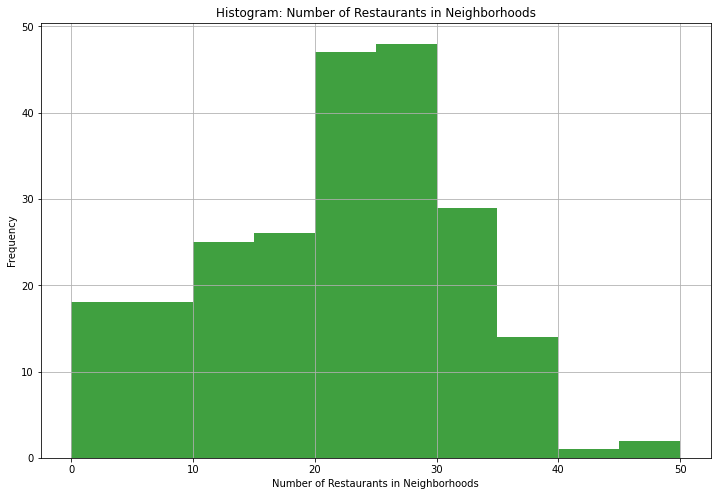

In [30]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
plt.figure(figsize=[12,8])
x = (df_main['Number of Restaurant']).values
#df_main['Number of Middle Eastern Restaurant']/
# the histogram of the data
plt.hist(x, facecolor='g', alpha=0.75)


plt.xlabel('Number of Restaurants in Neighborhoods')
plt.ylabel('Frequency')
plt.title('Histogram: Number of Restaurants in Neighborhoods')


plt.grid(True)
plt.show()

Number of restaurants reflects the interest in eating outside. But, we should focus on high income neighborhoods. Because, Food&Enjoy would like to reach real taste seekers. From the histogram, we could say it is fair to focus on the neighborhoods with median salary of at least 70K.

Populating the interactive namespace from numpy and matplotlib


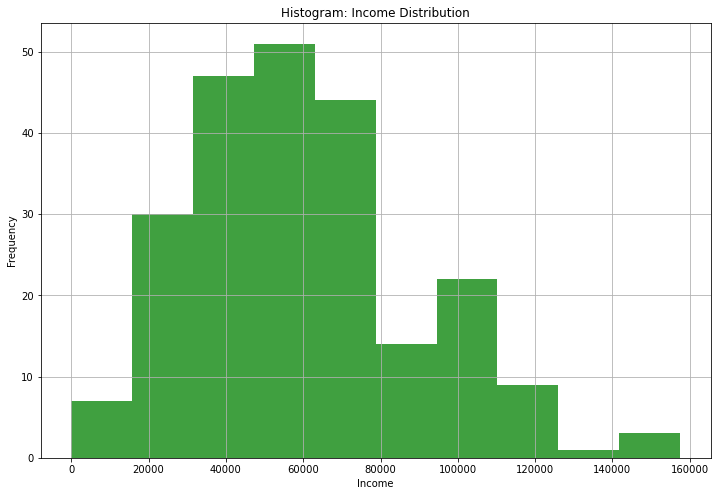

In [32]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
plt.figure(figsize=[12,8])
x = (df_main['Income']).values
#df_main['Number of Middle Eastern Restaurant']/
# the histogram of the data
plt.hist(x, facecolor='g', alpha=0.75)


plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram: Income Distribution')


plt.grid(True)
plt.show()

Another factor the prospective customers in neighborhoods. If there is not enough, then it would be wise to exclude those regions. It could be seen that there are a lot neighborhoods with less than 5 thousands.

Populating the interactive namespace from numpy and matplotlib


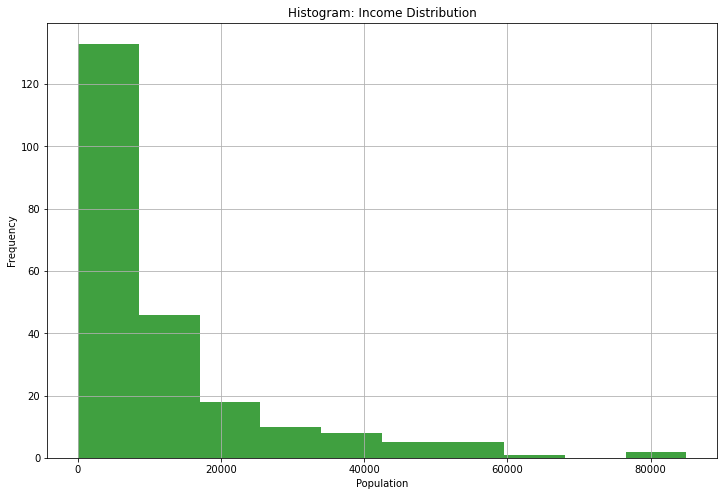

In [33]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
plt.figure(figsize=[12,8])
x = (df_main['Population']).values
#df_main['Number of Middle Eastern Restaurant']/
# the histogram of the data
plt.hist(x, facecolor='g', alpha=0.75)


plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram: Population Distribution')


plt.grid(True)
plt.show()

### Reduction of Data Set

Chicago has many neighborhoods and, as we are focusing on the best places for the new investment, some of them are not suitable to invest at the very first place. For the very first elimination it is wise to determine a limit for the median income. It is widely accepted that for a good living one should have at least 70K as an annual salary. Food&Enjoy's would like to reach tasty food seekers and, therefore, this limit for salary is quite applicable. After applying this restriction we have 77 neighborhoods with high income distributions. 

In [274]:
df_core=df_main[df_main["Income"]>70000]

In [275]:
df_core.shape

(77, 8)

High income constraints are not enough to make sure there are enough potential consumers in neighborhoods. At his point, we need to check total populations. Of course, any place could attract the people from other neighborhoods. But, the location gives signal whether the restaurant serves to rich people or low income residents. Arbitrarily, we prefer to focus on neighborhoods with at least 5 thousands residents. Now, we have 34 potential places to make the investment.

In [276]:
df_core=df_core[df_core["Population"]>5000] 

In [277]:
df_core.shape

(34, 8)

It is time to get more insights about those 34 regions. Let us look at the populations and densities in 34 neighborhoods

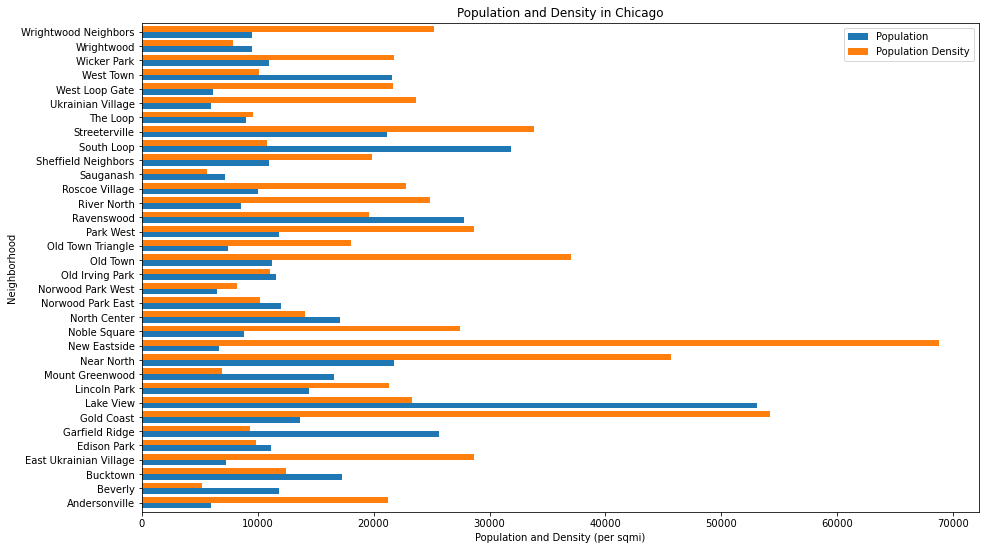

In [19]:
import matplotlib.pyplot as plt
# Plot the bar chart
df_core[['Neighborhood', 'Population', 'Population Density']].plot(kind='barh', figsize=(15, 9), width=0.8)
# Label the data
plt.xlabel('Population and Density (per sqmi)') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Population and Density in Chicago') # add title to the plot
plt.yticks (np.arange(34), df_core['Neighborhood'])
plt.show()

Another important factor is the income distributions. 14 neighborhoods have more than 100K annual median salary. These regions could be one for the investment.

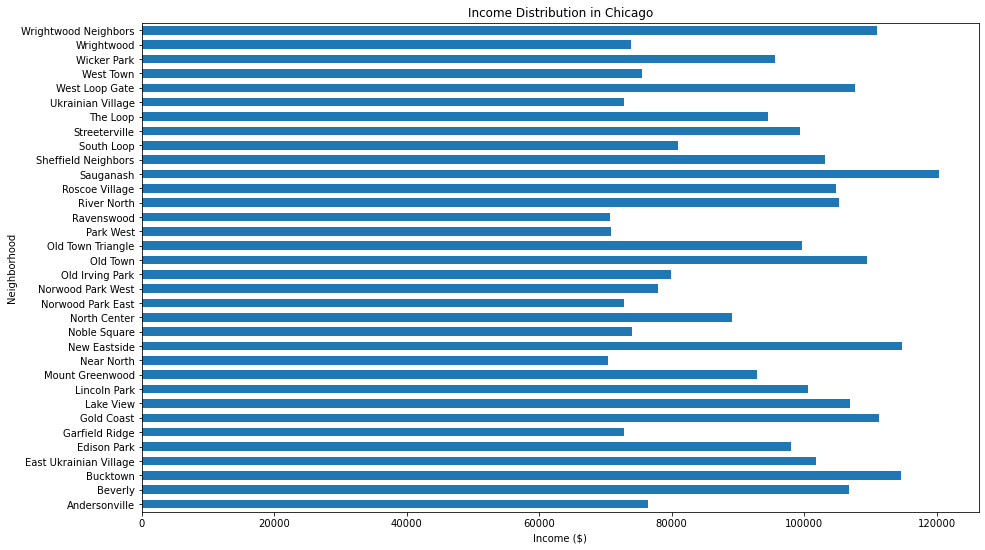

In [24]:
import matplotlib.pyplot as plt
# Plot the bar chart
df_core[['Neighborhood', 'Income']].plot(kind='barh', figsize=(15, 9), width=0.6, legend=None)
# Label the data
plt.xlabel('Income ($)') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Income Distribution in Chicago') # add title to the plot
plt.yticks (np.arange(34), df_core['Neighborhood'])
plt.show()

For te competition measure it is a good idea to visualize the number of restaurants. Moreover, the measure for the familiarity to Middle Eastern foods could be obtained from the number of restaurants similar to Middle Eastern cuisine. For example West Loop Gate has a lot restaurants and some of them serve Middle Eastern foods.

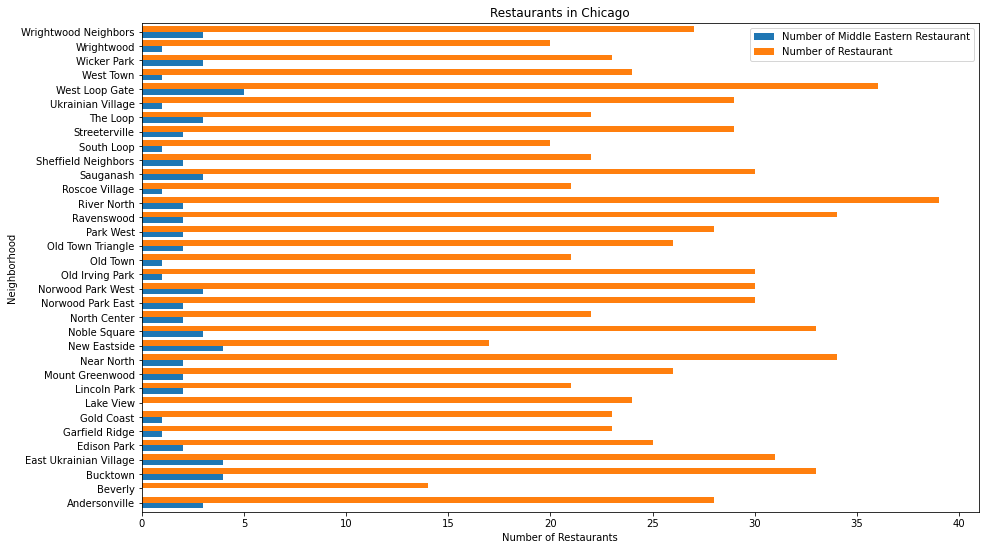

In [35]:
import matplotlib.pyplot as plt
# Plot the bar chart
df_core[['Neighborhood', 'Number of Middle Eastern Restaurant', 'Number of Restaurant']].plot(kind='barh', figsize=(15, 9), width=0.8)
# Label the data
plt.xlabel('Number of Restaurants') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Restaurants in Chicago') # add title to the plot
plt.yticks (np.arange(34), df_core['Neighborhood'])
plt.show()

But for the familiarity it is better to use the proportion of Middle Eastern type resaturants among all restaurants. More than 20% of the restaurants in New Eastside are of type interested.

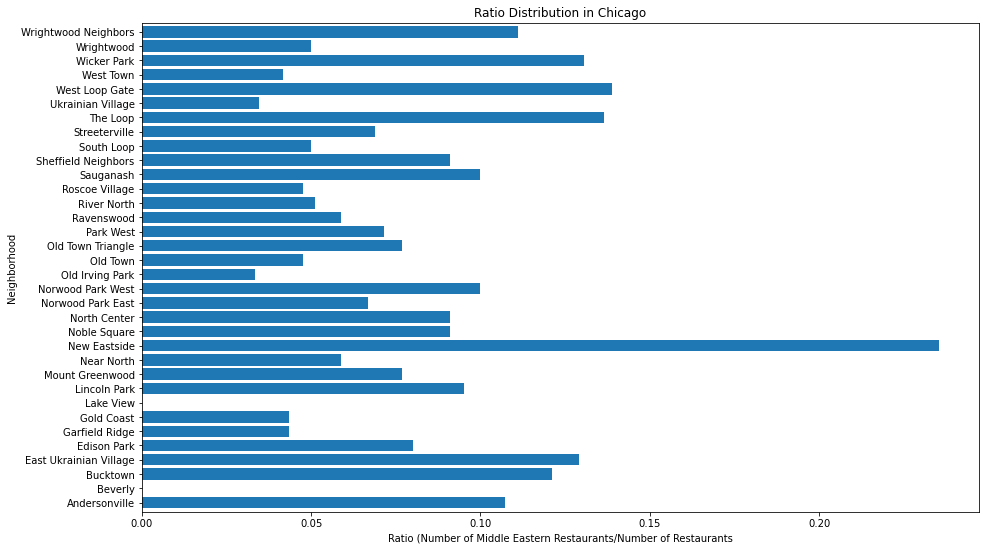

In [37]:
import matplotlib.pyplot as plt
# Plot the bar chart
dfs=pd.DataFrame(df_core['Number of Middle Eastern Restaurant']/df_core['Number of Restaurant'])
dfs.plot(kind='barh', figsize=(15, 9), width=0.8,legend=None)
# Label the data
plt.xlabel('Ratio (Number of Middle Eastern Restaurants/Number of Restaurants') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Ratio Distribution in Chicago') # add title to the plot
plt.yticks (np.arange(34), df_core['Neighborhood'])
plt.show()

### 3.2 Cluster Analysis

Cluster analysis would provide us better strategies. Before the procedure it is needed to manipulate the dataframe. Firstly, the income values are really high and would decrease the effects of other factors. So the income is divided by 1000 to reduce the large number effect.

In [278]:
df_core['Income'] = df_core['Income'] / 1000
df_core.head()

,Neighborhood,Latitude,Longitude,Income,Population,Population Density,Number of Middle Eastern Restaurant,Number of Restaurant
2,Andersonville,41.981724,-87.672123,76.489,5979,21264,3,28
13,Beverly,41.716645,-87.688542,106.744,11844,5162,0,14
23,Bucktown,41.979512,-87.702463,114.647,17313,12444,4,33
49,East Ukrainian Village,41.899629,-87.676646,101.865,7238,28622,4,31
55,Edison Park,42.007178,-87.823215,98.098,11115,9899,2,25


Not all of the information in dataframe is relevant to cluster analysis. Since we focus on neighborhood with higher income, the competition within neighborhoods and neighborhoods' familirty with middle eastern foods; new dataframe would include the income distribution, number of restaurants and the proportion of Middle Eastern restaurants for each neighborhood. Income values are adjusted, but we could not directly use the distribution of restaurants. This is simply because of that there could be more restaurants corresponding to higher population. Therefore, it is scaled by population and expressed as number of restaurants per 1000 residents. Similarly, we use the familiarty measure as percentage value instead of proportion.

In [279]:
df_clusters=df_core.drop(['Neighborhood','Latitude', 'Longitude', 'Population Density'],axis = 1)
df_clusters['Income'] = df_core['Income']
df_clusters['Number of Restaurants per 1000 People'] = df_core['Number of Restaurant']/df_core['Population']*1000
df_clusters['Familiarity'] = df_core['Number of Middle Eastern Restaurant']/df_core['Number of Restaurant']*100
df_clusters = df_clusters.drop(['Population', 'Number of Restaurant', 'Number of Middle Eastern Restaurant'], axis = 1)
df_clusters.head()

,Income,Number of Restaurants per 1000 People,Familiarity
2,76.489,4.683057,10.714286
13,106.744,1.182033,0.000000
23,114.647,1.906082,12.121212
49,101.865,4.282951,12.903226
55,98.098,2.249213,8.000000


In [280]:
df_clusters.replace([np.inf, -np.inf], np.nan, inplace=True) #check for infinte values

In [281]:
df_clusters = df_clusters.fillna(0) # fill non-numeric values with zero

Now, we must perform normalization as all values have different intervals.

In [282]:
from sklearn.preprocessing import StandardScaler
df_clusters = StandardScaler().fit_transform(df_clusters)
df_clusters

array([[-1.03874286e+00,  1.62549792e+00,  6.35567139e-01],
       [ 8.80887087e-01, -9.55891780e-01, -1.76642854e+00],
       [ 1.38231943e+00, -4.22032947e-01,  9.50980713e-01],
       [ 5.71322569e-01,  1.33048991e+00,  1.12629744e+00],
       [ 3.32312620e-01, -1.69034443e-01,  2.70615661e-02],
       [-1.27267694e+00, -1.16646535e+00, -7.91705657e-01],
       [ 1.17230538e+00, -5.84053655e-01, -7.91705657e-01],
       [ 8.92117446e-01, -1.49381506e+00, -1.76642854e+00],
       [ 4.92583161e-01, -7.52915139e-01,  3.68678730e-01],
       [ 3.07911129e-03, -6.74255524e-01, -4.19188226e-02],
       [-1.42076540e+00, -6.77161648e-01, -4.47685815e-01],
       [ 1.38948909e+00,  4.73064926e-02,  3.50854236e+00],
       [-1.19463546e+00,  9.19427891e-01,  2.71628399e-01],
       [-2.34471526e-01, -8.80545740e-01,  2.71628399e-01],
       [-1.27128108e+00,  1.21977689e-02, -2.71853452e-01],
       [-9.45029641e-01,  1.59614263e+00,  4.75434093e-01],
       [-8.17435001e-01,  8.68656165e-02

The Elbow method is now employed in order to determine the number of clusters. From the result it can be seen that we have 3 clusters.

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


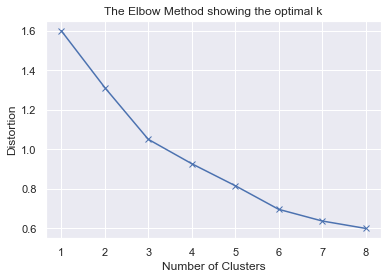

In [293]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


distortions = []
K = range(1,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_clusters)
    kmeanModel.fit(df_clusters)
    distortions.append(sum(np.min(cdist(df_clusters, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clusters.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [284]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:34] 

array([1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0,
       2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0])

In [285]:
df_core.insert(0, 'Cluster Labels', kmeans.labels_) #insert the cluster values for nieghborhoods
df_core = df_core.reset_index() # reset the indices 
del df_core['index']
df_core.head()

,Cluster Labels,Neighborhood,Latitude,Longitude,Income,Population,Population Density,Number of Middle Eastern Restaurant,Number of Restaurant
0,1,Andersonville,41.981724,-87.672123,76.489,5979,21264,3,28
1,2,Beverly,41.716645,-87.688542,106.744,11844,5162,0,14
2,0,Bucktown,41.979512,-87.702463,114.647,17313,12444,4,33
3,0,East Ukrainian Village,41.899629,-87.676646,101.865,7238,28622,4,31
4,2,Edison Park,42.007178,-87.823215,98.098,11115,9899,2,25


In [287]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Now, it has been created clusters and neighborhoods are labelled with them. It is time to create a map with these clusters. 
The following map is illustrating the clusters, where the radius of each marker is proportional to a number of restaurants per 1000 residents in each neighborhood. It can be easily realised that yellow cluster has less restaurants than others.

In [288]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red',  'blue', 'yellow']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, ngbh, pop, cluster, nRest in zip(df_core['Latitude'], df_core['Longitude'], df_core['Neighborhood'],df_core['Population'], df_core['Cluster Labels'], df_core['Number of Restaurant']):
    label = folium.Popup(str(ngbh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=nRest*2/pop*1000+1,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The map could be recreated by using income distribution of neighborhoods. As it can seen that red cluster has more income than others. But yellow cluster has more income than blue cluster contrary to previus map.

In [289]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red',  'blue','yellow']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, ngbh, pop, cluster, income in zip(df_core['Latitude'], df_core['Longitude'], df_core['Neighborhood'],df_core['Population'], df_core['Cluster Labels'], df_core['Income']):
    label = folium.Popup(str(ngbh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income/10-1,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Although the map visualization is a good representation of the data, it is difficult to understand the relationships between three factors that we use to classify the neighborhoods. At his point it is better use scatter plots in order to get more insights. The grey circle marker is representing the centroid of each cluster. As a reminder the axis are normlaized and does not represent the real values.

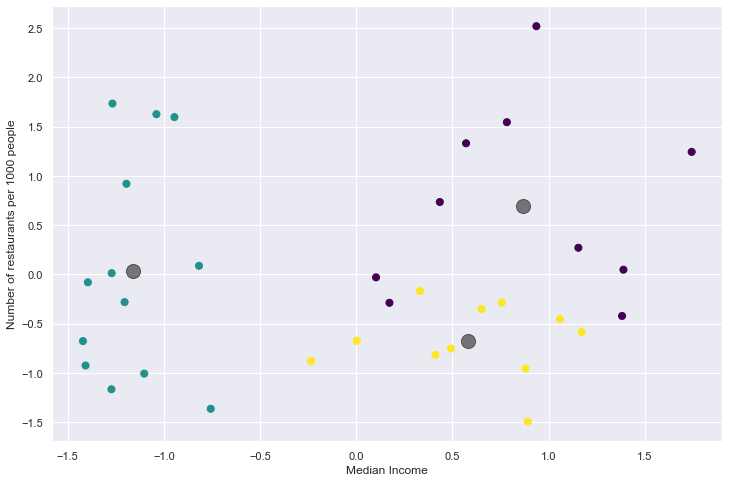

In [294]:
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(df_clusters)
plt.figure(figsize=[12,8])
plt.scatter(df_clusters[:, 0], df_clusters[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Median Income')
plt.ylabel('Number of restaurants per 1000 people')
plt.show()

The plot above indicates that the turquoise cluster on the left side has lower income than others and there are more competition just above zero level of x-axis. Yellow cluster has more income than the turquoise cluster. But the competition is relatively lower than others. The high income and competition could be seen in the purple cluster.

The plot below conveys a little more information about the neighborhoods familiarity with Middle Eastern cuisine. Some neighborhoods in the turquoise have those type of restaturants. Similarly, few neighborhoods in yellow cluster has also experience with this type of foods. But most of the purple cluster have tasted more, relatively. New Eastside (at the top of familiarity measure) has the most familiarity with this cuisine.

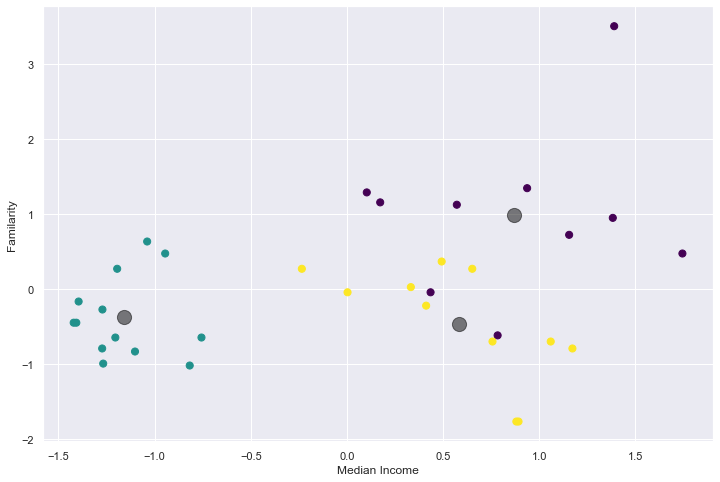

In [295]:
y_kmeans = kmeans.predict(df_clusters)
plt.figure(figsize=[12,8])
plt.scatter(df_clusters[:, 0], df_clusters[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.xlabel('Median Income')
plt.ylabel('Familarity')
plt.show()

In [221]:
df_core[(df_core['Cluster Labels'] == 0)] # purple cluster

,Cluster Labels,Neighborhood,Latitude,Longitude,Income,Population,Population Density,Number of Middle Eastern Restaurant,Number of Restaurant
23,0,Bucktown,41.979512,-87.702463,114.647,17313,12444,4,33
49,0,East Ukrainian Village,41.899629,-87.676646,101.865,7238,28622,4,31
124,0,New Eastside,41.886604,-87.623659,114.760,6686,68753,4,17
140,0,Old Town Triangle,41.915279,-87.642837,99.714,7483,18091,2,26
161,0,River North,41.891607,-87.643057,105.209,8528,24847,2,39
169,0,Sauganash,41.987970,-87.743066,120.351,7204,5637,3,30
192,0,The Loop,41.882136,-87.629127,94.486,9027,9628,3,22
214,0,West Loop Gate,41.880685,-87.645702,107.626,6107,21644,5,36
220,0,Wicker Park,41.908865,-87.686177,95.586,11020,21742,3,23
226,0,Wrightwood Neighbors,41.928982,-87.660545,111.069,9492,25227,3,27


In [223]:
df_core[(df_core['Cluster Labels'] == 1)] # turquoise cluster

,Cluster Labels,Neighborhood,Latitude,Longitude,Income,Population,Population Density,Number of Middle Eastern Restaurant,Number of Restaurant
2,1,Andersonville,41.981724,-87.672123,76.489,5979,21264,3,28
65,1,Garfield Ridge,41.803332,-87.787256,72.802,25657,9367,1,23
122,1,Near North,41.898952,-87.646386,70.468,21794,45636,2,34
125,1,Noble Square,41.899770,-87.667449,74.032,8858,27458,3,33
131,1,Norwood Park East,41.991071,-87.801077,72.824,12024,10177,2,30
132,1,Norwood Park West,41.990206,-87.823849,77.966,6461,8233,3,30
137,1,Old Irving Park,41.954618,-87.746242,79.977,11555,11052,1,30
144,1,Park West,41.929186,-87.648481,70.873,11818,28675,2,28
158,1,Ravenswood,41.968772,-87.702892,70.684,27788,19566,2,34
182,1,South Loop,41.861421,-87.645011,80.940,31855,10765,1,20


In [224]:
df_core[(df_core['Cluster Labels'] == 2)] # yellow cluster

,Cluster Labels,Neighborhood,Latitude,Longitude,Income,Population,Population Density,Number of Middle Eastern Restaurant,Number of Restaurant
13,2,Beverly,41.716645,-87.688542,106.744,11844,5162,0,14
55,2,Edison Park,42.007178,-87.823215,98.098,11115,9899,2,25
67,2,Gold Coast,41.903015,-87.635797,111.337,13639,54227,1,23
98,2,Lake View,41.946996,-87.669568,106.921,53042,23324,0,24
103,2,Lincoln Park,41.921898,-87.668973,100.624,14410,21322,2,21
120,2,Mount Greenwood,41.696868,-87.735257,92.909,16624,6963,2,26
127,2,North Center,41.946887,-87.702608,89.165,17131,14101,2,22
139,2,Old Town,41.907628,-87.637067,109.560,11269,37043,1,21
166,2,Roscoe Village,41.943193,-87.693575,104.788,10048,22773,1,21
174,2,Sheffield Neighbors,41.921299,-87.667658,103.130,10992,19865,2,22


## 4. Results and discussion <a name="results"></a>

This research, for the best place to enter the Chicago food industry with new restaurant investment by Food&Enjoy Corporations, provide many useful insights to construct concrete strategies. Chicago metropolitan area is big and has 228 neighborhoods. The area and the population of neighborhoods are challenging to analyze. The effort to to collect data results in many problems because the website for the statistics has no well defined area boundaries for neighborhoods. Therefore, it was required to manually data correction to built the dataframe. The tool of Selenium is a great way of getting dynamic data from interactive maps. Unfortunately, it is very sensitive to any intervention during the webscraping process.

Another problem has appeared when the necessary information from Foursquare API is searched. Since we are using freen version, we are limited to 100 venues per neighborhood. For small regions it can be enough, but for larger ones we are stucked with the limitation. Therefore, the search provide us with a limited number of venues and we could say the results could be improved with more information. 

Food&Enjoy Entrepreneurship state that they would like to reach customers who give more value to the taste of foods rather than prices. For the new entrance they prefer nieghborhoods having more acquaintances to Middle Eastern foods. Besides these factors, they would like to be careful about the high competition. With respect to very intial constraints, we have decide to reduce the data set so that all neighborhoods with income of less than 70K and with population of less than 5 thousands are excluded. Low population is prone to outliers and the residents with lower income would most probably not like to prefer Food&Enjoy's foods. 

During the valuable research we have focused on 44 neighborhoods after the reduction. Consequently, three clusters were well defined according the prosperity of neighborhoods, the level of competition and the measure of familiarity to Middle Eastern flavors. It has been found that the turquoise cluster, above given, is not suitable since it has relatively lower income and three neighborhoods are familiar with the desired foods. The other two clusters, yellow and purple clusters, have both higher income levels. Purple cluster prefers more Middle Eastern foods than yellow cluster. But, there are at least three neighborhoods in yellow cluster with Middle Eastern restaurants.

In terms of competition, purple cluster is more competitive than yellow cluster. This indicates there are still rooms for new restaurants in yellow cluster. Although purple cluster scares the new investments, the region has been already familiar with the Food&Enjoy's flavors.

## 5. Conclusion <a name="conclusion"></a>

In conclusion, our data science analysis indicates that Food&Enjoy could invest either in yellow or purple cluster. It is advised to prefer neighborhoods with the Cook County, very center and attraction place of Chicago Metropolitan Area. As a reminder the room for new entrance is lower for purple cluster than yellow one. Unfortunately, the analysis is here very limited due the lack of information. Therefore, it would be wise to perform more research in these two candidate clusters.